# Practical Machine learning walkthrough


In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv('Iris.csv')
type(iris)

pandas.core.frame.DataFrame

In [3]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Let's see how many examples we have of each species as well as the data type for 
# each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

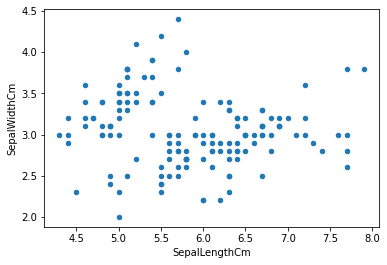

In [6]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

In [7]:
iris.drop("Id",axis=1,inplace=True)

# store feature matrix in "X"
X = iris.drop("Species",axis=1)

# store response vector in "y"
y = iris['Species']

# Cross Validation

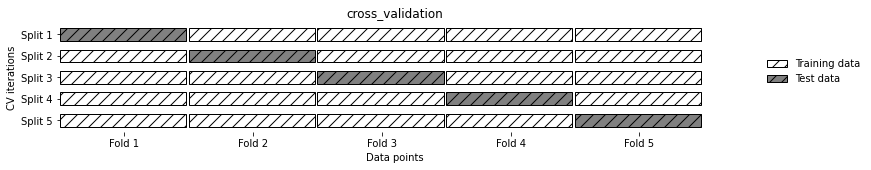

In [9]:
import mglearn
mglearn.plots.plot_cross_validation()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X, y,cv=5)
print("cross-validation scores: ", scores)
print ("Mean Cross-validation score: ", scores.mean())

cross-validation scores:  [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean Cross-validation score:  0.9600000000000002


In [11]:
scores = cross_val_score(dtc, X, y, cv=10)
print("cross-validation scores: ", scores)
scores.mean()

cross-validation scores:  [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


0.9533333333333334

# Stratified K-Fold cross-validation

In [12]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


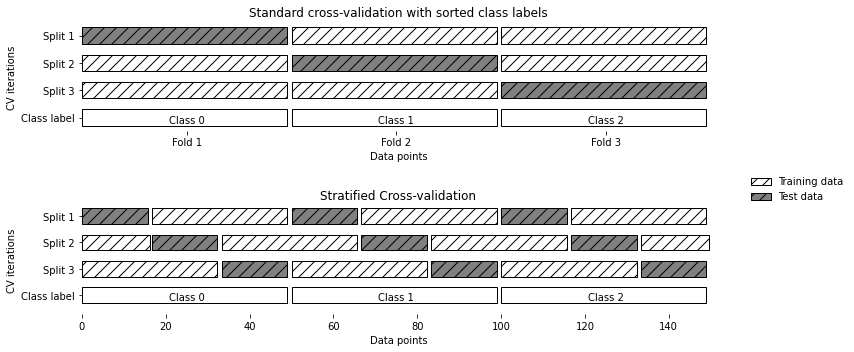

In [13]:
#% matplotlib inline
mglearn.plots.plot_stratified_cross_validation()

# Improving a model using hypermeters
----
'criterion' : ["gini", "entropy"]

'splitter' : ["best", "random"]

'max_depthint' : [3, 5, 7, 10]

# The danger of overfitting the parameters and the validation set

threefold_split


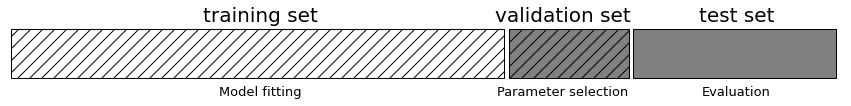

In [14]:
print("threefold_split")
mglearn.plots.plot_threefold_split()

# GridSearchCV (A meta classifier)
----
To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then perform
all the necessary model fits. The keys of the dictionary are the names of parameters
we want to adjust

In [37]:
param_grid = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'max_depth' : [3, 5, 7, 10]}
print (param_grid)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 5, 7, 10]}


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'splitter': ['best', 'random']})

Fitting the GridSearchCV object not only searches for the best parameters, it also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance.

In [39]:
grid_search.score(X_test, y_test)

0.9473684210526315

Choosing the parameters using cross-validation, we found a model that achieves
best accuracy on the test set. The important part here is that we did not use the
test set to choose the parameters.

The parameters that were found are scored in the best_params_ attribute, and the
best cross-validation accuracy (the mean accuracy over the different splits for this
parameter setting) is stored in best_score_:

In [40]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
0.9557312252964426


Again, be careful not to confuse best_score_ with the generalization performance of
the model as computed by the score method on the test set. Using the score method
(or evaluating the output of the predict method) employs a model trained on the
whole training set. The best_score_ attribute stores the mean validation crossvalidation
accuracy, with cross-validation performed on the training set.

Sometimes it is helpful to have access to the actual model that was found, for example
to look at coefficients or feature importances. You can access the model with the best
parameters trained on the whole training set using the best_estimator_ attribute.

Because grid_search itself has predict and score methods, using best_estimator_
is not needed to make predictions or evaluate the model.

In [41]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

# Analyzing the results of cross-validation

In [42]:
#grid_search.grid_scores_
grid_search.cv_results_

{'mean_fit_time': array([0.00674472, 0.00312471, 0.00526156, 0.        , 0.        ,
        0.00414691, 0.        , 0.00178418, 0.00319943, 0.00480742,
        0.00159063, 0.00314889, 0.        , 0.00656767, 0.00383973,
        0.00392804]),
 'std_fit_time': array([0.00343291, 0.00624943, 0.00664132, 0.        , 0.        ,
        0.00608091, 0.        , 0.00356836, 0.00391855, 0.00392541,
        0.00198868, 0.00629778, 0.        , 0.00805892, 0.00656232,
        0.00611146]),
 'mean_score_time': array([0.00164499, 0.00313048, 0.        , 0.00627542, 0.00312729,
        0.00230575, 0.00312538, 0.00157919, 0.        , 0.00320272,
        0.00319905, 0.00312304, 0.00312505, 0.00292344, 0.00327311,
        0.00315437]),
 'std_score_time': array([0.00328999, 0.00626097, 0.        , 0.00768583, 0.00625458,
        0.00461149, 0.00625076, 0.00315838, 0.        , 0.00392252,
        0.00391803, 0.00624609, 0.0062501 , 0.00584688, 0.0062417 ,
        0.00630875]),
 'param_criterion': masked

In [44]:
# Plot the accuracy score on y-axis in a single graph for the following experiments
#criterion: ['gini','entropy']
#max_depth: [3, 5, 7]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ["gini", "entropy"],
              'max_depth' : [3, 5, 7]}

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7]})

In [47]:
grid_search.score(X_test, y_test)

0.9473684210526315

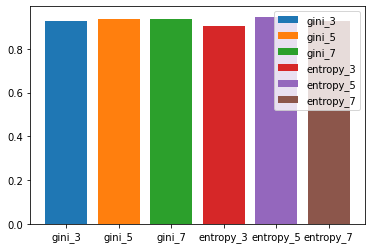

In [58]:
import matplotlib.pyplot as plt 

x = np.array(['gini_3','gini_5','gini_7','entropy_3','entropy_5','entropy_7'])
y = grid_search.cv_results_['mean_test_score']

plt.bar(x[0],y[0],label = x[0])
plt.bar(x[1],y[1],label = x[1])
plt.bar(x[2],y[2],label = x[2])
plt.bar(x[3],y[3],label = x[3])
plt.bar(x[4],y[4],label = x[4])
plt.bar(x[5],y[5],label = x[5])
plt.legend()

In [68]:
# Plot the accuracy on y-axis and value of K on X-axis using 
# KNN Classifier 3 5 7 9 
from sklearn.neighbors import KNeighborsClassifier


iris = pd.read_csv('Iris.csv')
type(iris)
iris.drop("Id",axis=1,inplace=True)

# store feature matrix in "X"
X = iris.drop("Species",axis=1)

# store response vector in "y"
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_9 = KNeighborsClassifier(n_neighbors=9)

knn_3.fit(X_train, y_train)
knn_5.fit(X_train, y_train)
knn_7.fit(X_train, y_train)
knn_9.fit(X_train, y_train)

accuracy = [knn_3.score(X_test, y_test), knn_5.score(X_test, y_test),knn_7.score(X_test, y_test),knn_9.score(X_test, y_test)]

[1.0, 1.0, 1.0, 1.0]

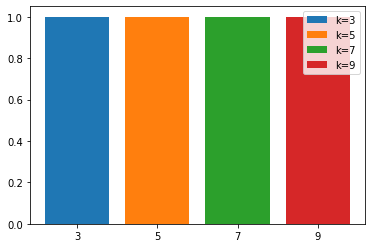

In [69]:


x = np.array(['3','5','7','9'])
y = accuracy

plt.bar(x[0],y[0],label = 'k=3')
plt.bar(x[1],y[1],label = 'k=5')
plt.bar(x[2],y[2],label = 'k=7')
plt.bar(x[3],y[3],label = 'k=9')
plt.legend()